In [ ]:
1.Importing My Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
2.First, load the dataset

In [2]:
# Load the dataset
Data = pd.read_csv('Flyzy Flight Cancellation - Sheet1.csv')
# Display the first few rows of the dataset
Data.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0


In [3]:
# print the shape of the dataset
Data.shape

(3000, 14)

In [4]:
# print info about the dataset
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

In [5]:
# print statistics
Data.describe()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.997429e+06,498.909333,11.435000,3.963000,6.381000,0.524023,26.793383,2.317439,0.515885,0.690667
std,2.868139e+06,98.892266,6.899298,2.016346,3.473979,0.290694,27.874733,1.430386,0.295634,0.462296
min,3.681000e+03,138.000000,0.000000,1.000000,1.000000,0.000965,0.000000,0.000103,0.001039,0.000000
25%,2.520313e+06,431.000000,6.000000,2.000000,3.000000,0.278011,7.000000,1.092902,0.265793,0.000000
50%,5.073096e+06,497.000000,12.000000,4.000000,6.000000,0.522180,18.000000,2.126614,0.517175,1.000000
75%,7.462026e+06,566.000000,17.000000,6.000000,9.000000,0.776323,38.000000,3.525746,0.770370,1.000000
max,9.999011e+06,864.000000,23.000000,7.000000,12.000000,1.099246,259.000000,5.189038,1.123559,1.000000


In [ ]:
3.Check for Missing values:

In [6]:
# Check for missing values
Data_missing_values = Data.isnull().sum()
# Display the columns with missing values and their count
print(Data_missing_values[Data_missing_values > 0])

Series([], dtype: int64)


In [7]:
missing_values = Data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64


In [8]:
#Handling duplicate values
Data.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [9]:
Data.duplicated(keep=False).sum()

0

In [ ]:
4. Outliers and Z-Score method

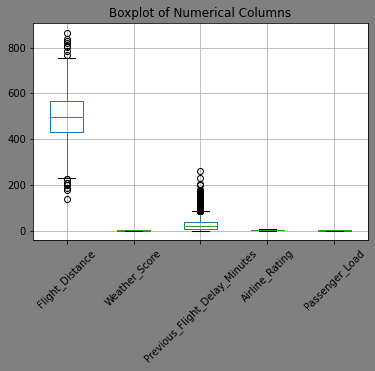

Flight_Distance                  10
Previous_Flight_Delay_Minutes    51
dtype: int64


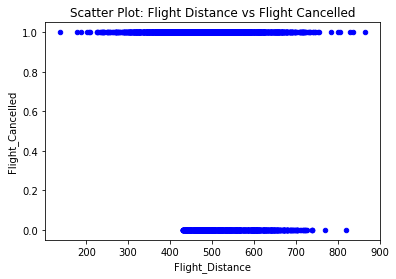

In [13]:
# Set the background color to white for visibility
plt.figure(facecolor='Grey')
# Select numerical columns for outlier detection
numerical_cols = ['Flight_Distance', 'Weather_Score','Previous_Flight_Delay_Minutes', 'Airline_Rating', 'Passenger_Load']
# Plot boxplots for numerical columns
Data[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Columns')
plt.show()
# Calculate Z-scores for numerical columns
Data_z_scores = np.abs(stats.zscore(Data[numerical_cols]))
# Define a threshold for identifying outliers
threshold = 3
# Identify outliers
outliers = np.where(Data_z_scores > threshold)
# Display the number of outliers in each numerical column
outlier_counts = pd.Series(outliers[1]).value_counts().sort_index()
outlier_counts.index = [numerical_cols[i] for i in outlier_counts.index]
print(outlier_counts)
# Plot scatter plot for an example numerical column against Flight_Cancelled
Data.plot.scatter(x='Flight_Distance', y='Flight_Cancelled', color='blue',
title='Scatter Plot: Flight Distance vs Flight Cancelled')
plt.show()

In [ ]:
To find outliers in a dataset, Z-score calculations and boxplots are utilized.

The numerical column distribution is seen using a boxplot, which highlights any possible
outliers that extend past the whiskers. The dataset had the following counts of outliers, 
determined by applying a threshold of 3 to Z-scores in order to identify outliers: 
Distance of Flight: Ten Outliers 51 outliers in the last flight delay minutes

The distribution of flight distances for both cancelled and non-cancelled flights is 
shown in the scatter plot of flight distance against flight cancellation, which does not
explicitly show outliers.

Given the underlying characteristics of the data, aircraft delay fluctuation may make 
outliers in "Previous Flight Delay Minutes" legitimate. Long-haul flights may be 
indicated by outliers in the "Flight Distance" column. In order to decide how to handle
these outliers, it is imperative that the background be thoroughly examined. If these 
outliers represent plausible scenarios, one possible strategy would be to keep them in 
place; if not, a cap may be imposed at a particular threshold in the event that they are
shown to materially skew the study.

In [14]:
#find the limits
upper_limit=Data['Previous_Flight_Delay_Minutes'].mean() + 4 *Data['Previous_Flight_Delay_Minutes'].std()
lower_limit=Data['Previous_Flight_Delay_Minutes'].mean() - 4 *Data['Previous_Flight_Delay_Minutes'].std()
print("upper limit:", upper_limit)
print("lower limit:", lower_limit)

upper limit: 138.29231425080766
lower limit: -84.70554874814101


In [15]:
#trimming - deleting the outlier data
new_Data=Data.loc[(Data['Previous_Flight_Delay_Minutes'] < upper_limit) &(Data['Previous_Flight_Delay_Minutes'] > lower_limit)]
print('Before removing outliers:',len(Data))
print('after removing outliers:',len(new_Data))
print('Outliers:', len(Data)-len(new_Data))

Before removing outliers: 3000
after removing outliers: 2974
Outliers: 26


In [ ]:
5.  Data types:

In [16]:
# Check the data types of each column
data_types = Data.dtypes
print(data_types)

Flight ID                          int64
Airline                           object
Flight_Distance                    int64
Origin_Airport                    object
Destination_Airport               object
Scheduled_Departure_Time           int64
Day_of_Week                        int64
Month                              int64
Airplane_Type                     object
Weather_Score                    float64
Previous_Flight_Delay_Minutes    float64
Airline_Rating                   float64
Passenger_Load                   float64
Flight_Cancelled                   int64
dtype: object


In [ ]:
Every column in the dataset has had its data types thoroughly examined. Though most data 
types are appropriate for the data they pertain to, there are a few things to keep in 
mind:
The format of Scheduled_Departure_Time, which is represented as int64, may not be 
instantly interpreted as a time (such as an integer timestamp). For easier manipulation 
and interpretation, this could be better off being converted to a datetime format, 
depending on the study.

An int64, Flight_Cancelled, is suitable for a binary indicator 
(0 for not cancelled, 1 for cancelled).
However, changing this to a boolean type might be taken into consideration for increased 
analysis consistency and clarity. For numerical analysis, Day_of_Week and Month are 
alternatively represented as int64. At some point throughout the study, it could be 
helpful to translate these to their corresponding names (Monday, January, for example) 
to improve readability. As is common for textual data, columns like Airline, 
Origin_Airport, Destination_Airport, and Airplane_Type are of type object. For 
quantitative analysis, numerical columns of numerical types (int64 or float64), such as 
Flight_Distance, Weather_Score, Previous_Flight_Delay_Minutes, Airline_Rating, and 
Passenger_Load, are appropriate.

In [ ]:
Exploratory Data Analysis (EDA And Python)

The dataset will undergo exploratory data analysis, or EDA, in advance of the predictive
model being built. In order to extract important insights for precise modeling, this will
entail acquiring descriptive statistics, visualizing data distributions, examining 
feature associations through scatter plots or correlation matrices, and researching how 
features relate to the target variable.
Analyze the dataset using EDA to gain a deeper understanding of the information and 
uncover insights. This could include:
Characteristic Statistics To obtain the dataset's descriptive statistics, use the 
relevant function.
Data distribution: To observe the distribution of data in each column, plot bar charts 
or histograms.
Relationship between features: To see the relationship between several features, plot 
correlation matrices, pair plots, or scatter plots.
Link between features and target variable: Examine the relationships between various 
features and the target variable.

In [ ]:
6.  Descriptive Statistics

In [17]:
descriptive_stats = Data.describe()
print(descriptive_stats)

          Flight ID  Flight_Distance  Scheduled_Departure_Time  Day_of_Week  \
count  3.000000e+03      3000.000000               3000.000000  3000.000000   
mean   4.997429e+06       498.909333                 11.435000     3.963000   
std    2.868139e+06        98.892266                  6.899298     2.016346   
min    3.681000e+03       138.000000                  0.000000     1.000000   
25%    2.520313e+06       431.000000                  6.000000     2.000000   
50%    5.073096e+06       497.000000                 12.000000     4.000000   
75%    7.462026e+06       566.000000                 17.000000     6.000000   
max    9.999011e+06       864.000000                 23.000000     7.000000   

             Month  Weather_Score  Previous_Flight_Delay_Minutes  \
count  3000.000000    3000.000000                    3000.000000   
mean      6.381000       0.524023                      26.793383   
std       3.473979       0.290694                      27.874733   
min       1.0000

In [ ]:
7.  Distribution of data

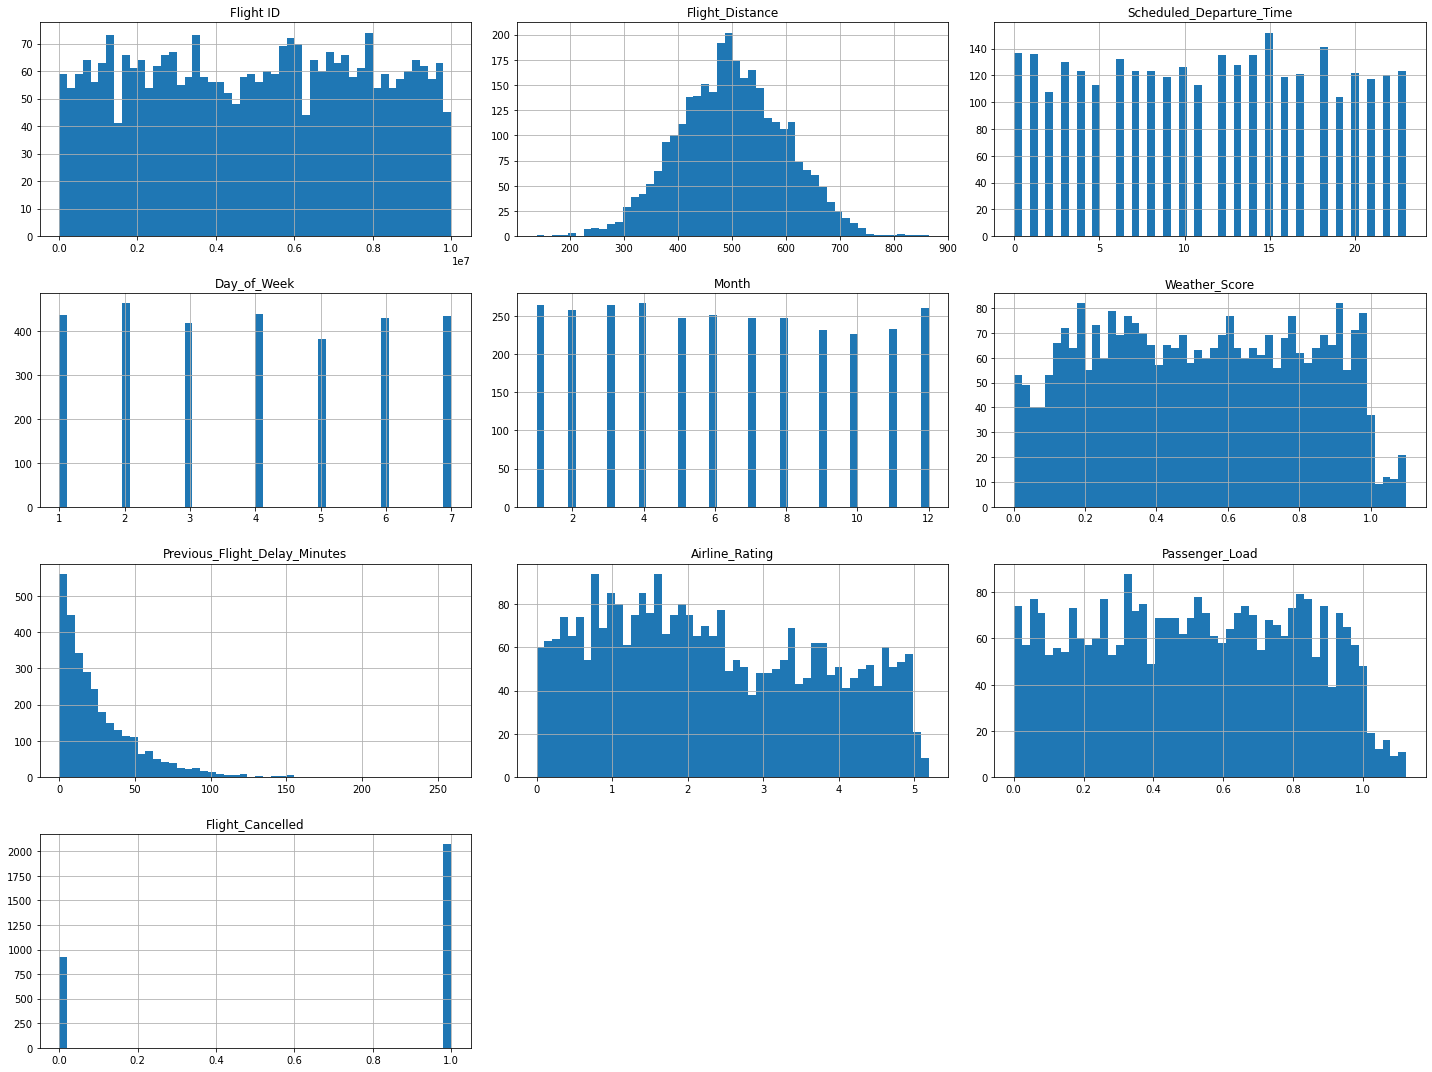

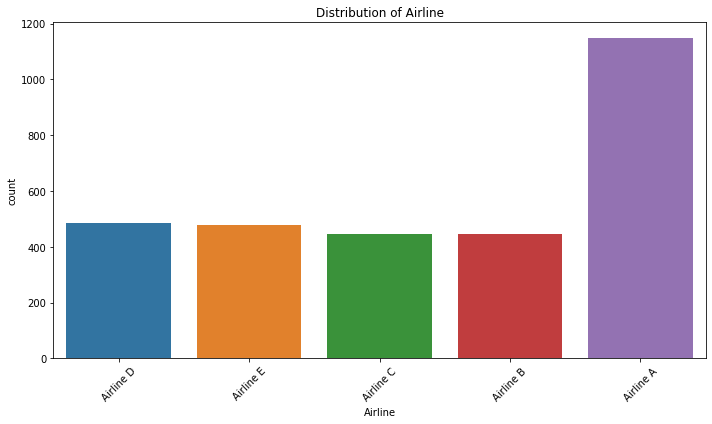

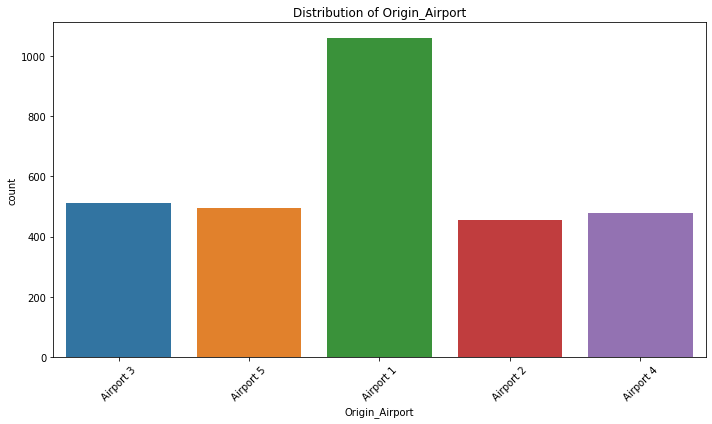

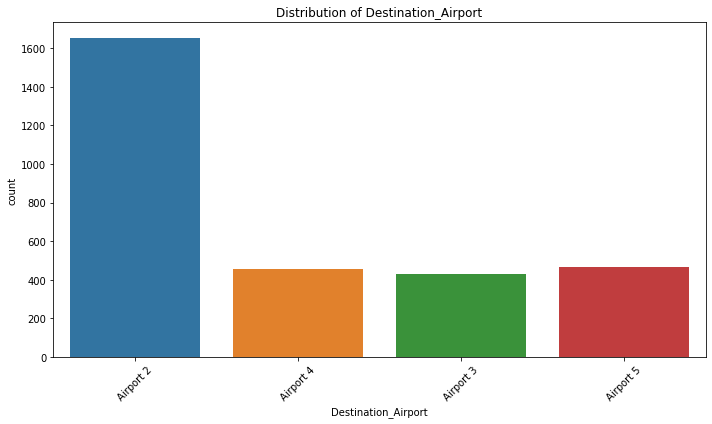

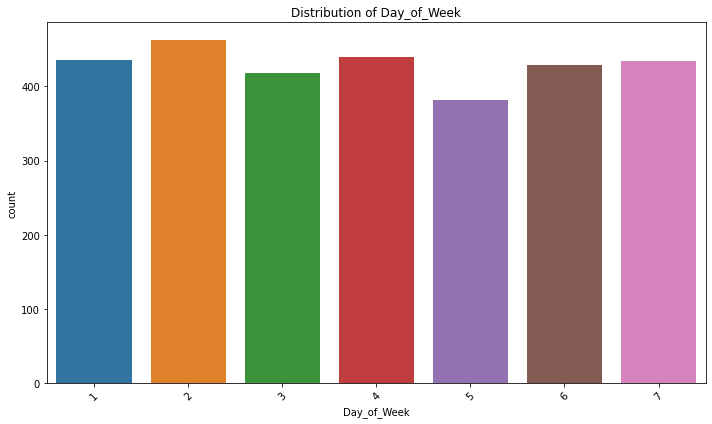

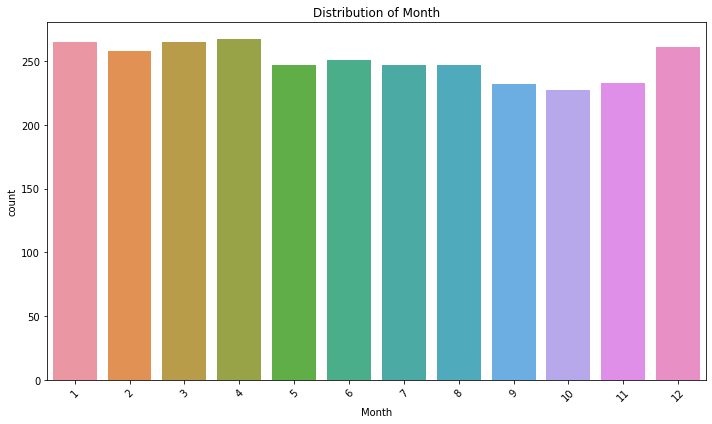

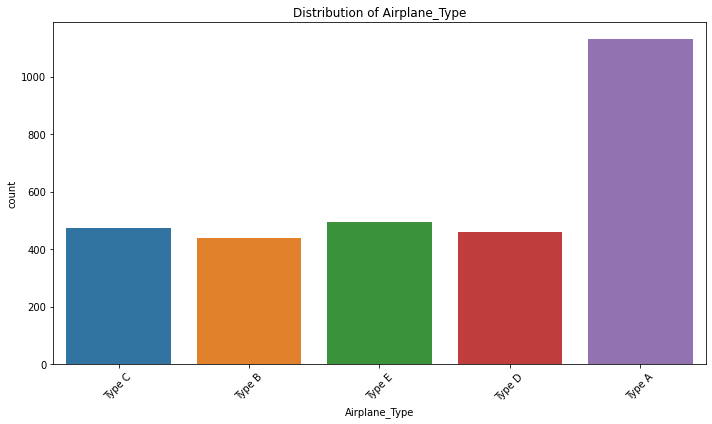

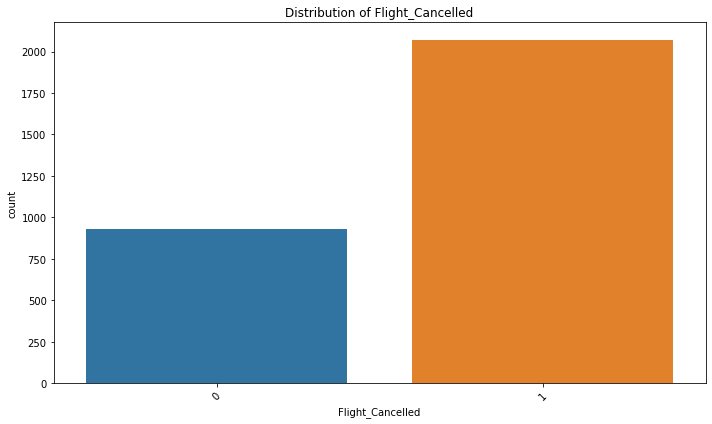

In [19]:
# Plotting histograms for numerical columns
Data.hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()
# Plotting bar charts for categorical columns
categorical_columns = ['Airline', 'Origin_Airport', 'Destination_Airport','Day_of_Week', 'Month', 'Airplane_Type', 'Flight_Cancelled']
for column in categorical_columns:
 plt.figure(figsize=(10, 6))
 sns.countplot(x=column, data=Data)
 plt.title('Distribution of ' + column)
 plt.xticks(rotation=45)
 plt.tight_layout()
 plt.show()

In [ ]:
The distribution of the data across different features is better understood thanks to 
these graphics. The distribution of values for attributes such as flight distance, 
departure time, and weather score, for instance, is displayed in the histograms for 
numerical columns. The frequency of flights across various airlines, airports, days of 
the week, months, types of airplanes, and the percentage of cancelled flights are all 
displayed in the bar charts for the categorical columns.

In [ ]:
8.  Relationship between features

/tmp/ipykernel_264/808873065.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Data.corr()


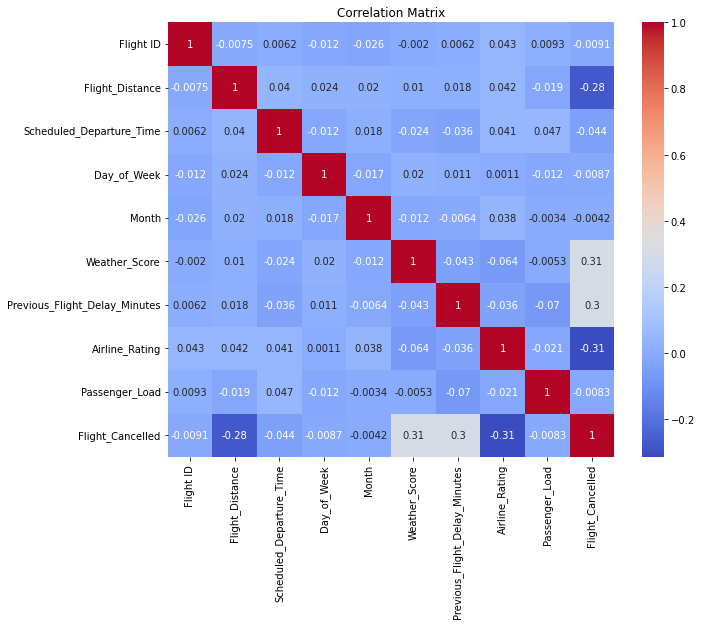

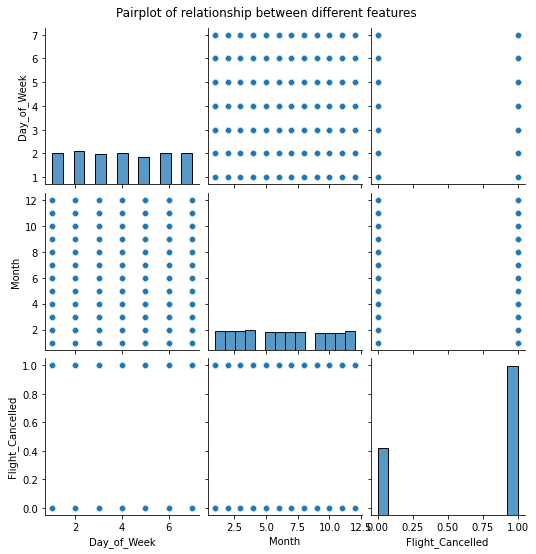

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
Data = pd.read_csv('Flyzy Flight Cancellation - Sheet1.csv')
# Display the first few rows of the dataset
Data.head()
# Plotting correlation matrix
corr = Data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Pairplot for a subset of features
# Selecting a subset of features for clarity in visualization
features = ['Airline', 'Origin_Airport', 'Destination_Airport', 'Day_of_Week','Month', 'Airplane_Type', 'Flight_Cancelled']
sns.pairplot(Data[features])
plt.suptitle('Pairplot of relationship between different features', y=1.02)
plt.show()

In [ ]:
9. Relationship between features and target variable

/tmp/ipykernel_264/2074352779.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Data.corr()


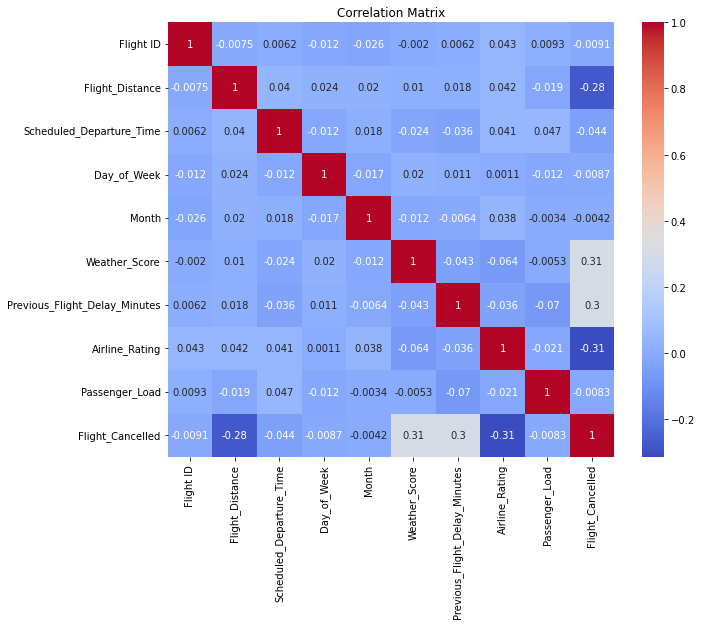

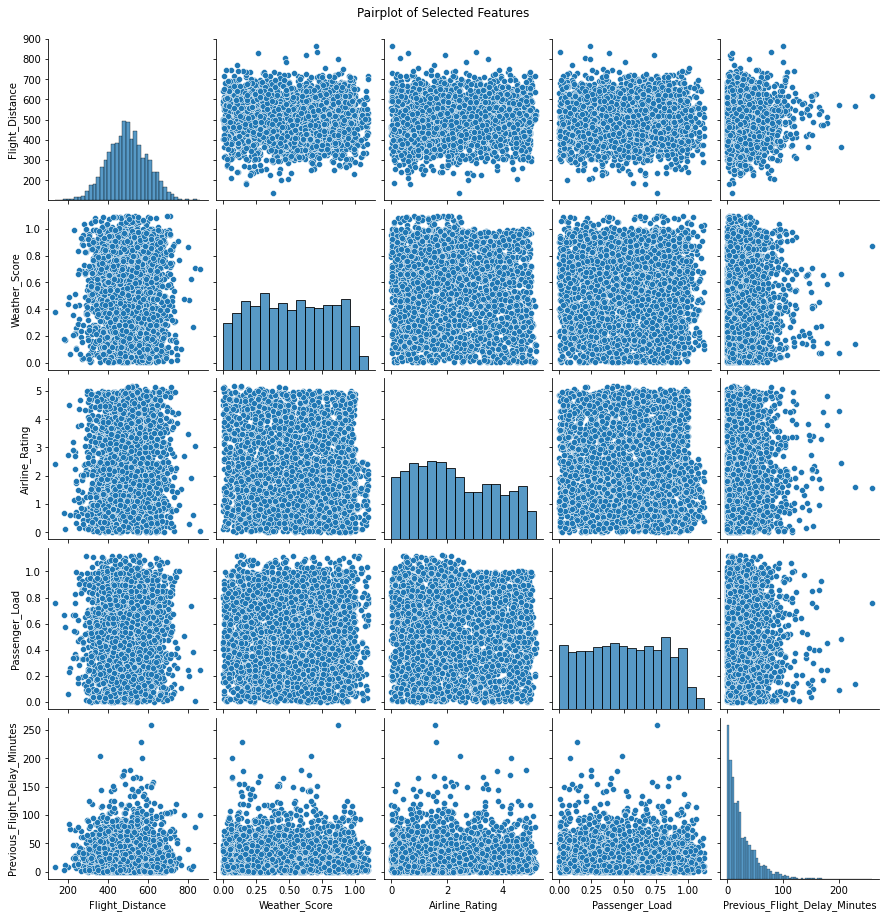

In [22]:
# Correcting the column names and plotting again
features = ['Flight_Distance', 'Weather_Score', 'Airline_Rating','Passenger_Load', 'Previous_Flight_Delay_Minutes']
# Plotting correlation matrix
corr = Data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Pairplot for the corrected subset of features
sns.pairplot(Data[features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

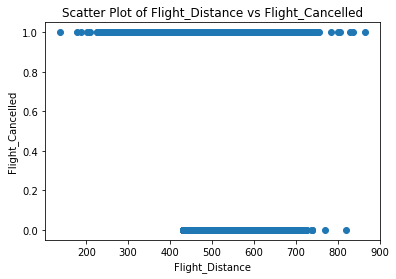

In [23]:
import matplotlib.pyplot as plt
# Scatter plot with target variable
plt.scatter(Data['Flight_Distance'], Data['Flight_Cancelled'])
plt.xlabel('Flight_Distance')
plt.ylabel('Flight_Cancelled')
plt.title('Scatter Plot of Flight_Distance vs Flight_Cancelled')
plt.show()

In [ ]:
Preprocessing and Model Building (ML & Algorithms)

The dataset will be divided into training and test sets in order to use logistic regression to predict aircraft cancellations. For the purpose of understanding the model, categorical variables will be encoded, and feature scaling will provide consistency across feature ranges. To determine how well the logistic regression model predicts the test data, it will be constructed and assessed using the relevant metrics.
Divide the dataset into test set and training set. Next, create a model using Logistic Regression to forecast flight cancellations. This includes:
Coding variables that are categorical: The dataset has some category columns. These must be encoded in a way that the model can comprehend.
Scaling Features: The dataset's feature ranges diverge significantly.Scaling the features to a similar range can help the model perform better.
Model Building: Build a Logistic Regression model using the training data.
Model Evaluation: Evaluate the model using appropriate metrics and the test data.
Split the dataset into a training set and a test set

In [24]:
# Step 1: Split the dataset into training and test sets
X = Data.drop('Flight_Cancelled', axis=1) # Features
y = Data['Flight_Cancelled'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [26]:
# Step 2: Encode categorical variables
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
for col in categorical_cols:
 le = LabelEncoder()
 X_train[col] = le.fit_transform(X_train[col])
 X_test[col] = le.transform(X_test[col])

In [27]:
# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Step 4: Build the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
# Step 5: Evaluate the model
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print(f"Training Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")

Training Accuracy: 0.82
Test Accuracy: 0.81
